In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from PIL import Image
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/AY 2023-2024/1st Semester/App Physics 167/CIE_xyz_1964_10deg.xlsx'
image_path = '/content/drive/MyDrive/AY 2023-2024/1st Semester/App Physics 167/CIE1964.png'

In [3]:
#reading the files and converting the columns to float
chromaticity_table = pd.read_excel(file_path)
chromaticity_table["Wavelength"] = chromaticity_table["Wavelength"].astype(float)
chromaticity_table["X"] = chromaticity_table["X"].astype(float)
chromaticity_table["Y"] = chromaticity_table["Y"].astype(float)
chromaticity_table["Z"] = chromaticity_table["Z"].astype(float)
chromaticity_table["X+Y+Z"] = chromaticity_table["X+Y+Z"].astype(float)
chromaticity_table["x"] = chromaticity_table["x"].astype(float)
chromaticity_table["y"] = chromaticity_table["y"].astype(float)
chromaticity_table["z"] = chromaticity_table["z"].astype(float)
chromaticity_table.head()


,Wavelength,x_bar,y_bar,z_bar,X,Y,Z,X+Y+Z,x,y,...,u',v',D65_x_bar,D65_y_bar,D65_z_bar,X_n,Y_n,Z_n,u'_d65,v'_d65
0,360.0,1.222000e-07,1.339800e-08,5.350270e-07,0.000044,0.000005,0.000193,0.000241,0.182218,0.019978,...,0.253494,0.062534,0.000006,6.248599e-07,0.000025,1101.79994,1161.93003,1247.690134,0.197865,0.469492
1,370.0,5.958600e-06,6.511000e-07,2.614370e-05,0.002205,0.000241,0.009673,0.012119,0.181923,0.019879,...,0.253137,0.062236,0.000310,3.391521e-05,0.001362,NaN,NaN,NaN,NaN,NaN
2,380.0,1.599520e-04,1.736400e-05,7.047760e-04,0.060782,0.006598,0.267815,0.335195,0.181333,0.019685,...,0.252416,0.061654,0.007994,8.677746e-04,0.035222,NaN,NaN,NaN,NaN,NaN
3,390.0,2.361600e-03,2.534000e-04,1.048220e-02,0.921024,0.098826,4.088058,5.107908,0.180313,0.019348,...,0.251173,0.060639,0.129057,1.384785e-02,0.572833,NaN,NaN,NaN,NaN,NaN
4,400.0,1.910970e-02,2.004400e-03,8.601090e-02,7.643880,0.801760,34.404360,42.850000,0.178387,0.018711,...,0.248817,0.058721,1.581421,1.658739e-01,7.117823,NaN,NaN,NaN,NaN,NaN


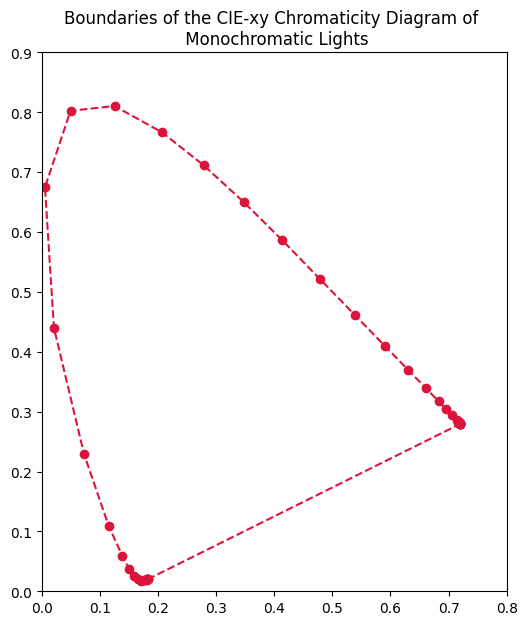

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#plotting the boundaries of the CIExy Chromaticity Diagram
fig, ax = plt.subplots(figsize= (6,7))
ax.plot(chromaticity_table["x"], chromaticity_table["y"], ls = '--', color= 'crimson', marker = 'o')
ax.plot([0.18221808,0.7203576], [0.01997838,0.2796424], ls = '--', color= 'crimson', marker = 'o')
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.9)
ax.set_title('Boundaries of the CIE-xy Chromaticity Diagram of \n Monochromatic Lights')
plt.savefig("boundaries.png")
plt.show()
files.download('boundaries.png')


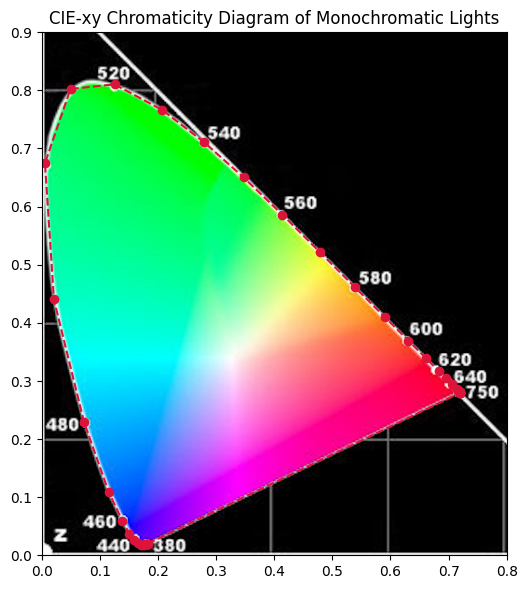

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
#overlaying the tongue
img = np.array(Image.open(image_path))
fig, ax = plt.subplots(figsize= (6,8))
ax.plot(chromaticity_table["x"], chromaticity_table["y"], ls = '--', color= 'crimson', marker = 'o')
ax.plot([0.18221808,0.7203576], [0.01997838,0.2796424], ls = '--', color= 'crimson', marker = 'o')
ax.imshow(img, extent = [0,1,0,1])
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.9)
ax.set_title('CIE-xy Chromaticity Diagram of Monochromatic Lights')
plt.savefig("CIExyCD.png")
plt.show()
files.download('CIExyCD.png')


In [6]:
temp = np.arange(1000, 10000 + 1, 1000)
def blackbody_radiation(wavelength, temperature):
  '''solving for the blackbody radiation per wavelength and temperature'''
  h = 6.6262e-34
  c = 3.0e8
  k = 1.380649e-23
  num = 2*h*c**2
  wavelength_k_t = np.float64(wavelength)*np.float64(k)*temperature
  exponential = np.exp((h*c)/(wavelength_k_t))
  blackbody = (num)/( (wavelength**5)*(exponential - 1)  )
  return blackbody


Pval = []
for temp in temp:
    Pval.append(blackbody_radiation(chromaticity_table["Wavelength_m"], temp))
Pval = np.array(Pval)

int_x = np.multiply(Pval, np.array(chromaticity_table["x_bar"]))
int_y = np.multiply(Pval, np.array(chromaticity_table["y_bar"]))
int_z = np.multiply(Pval, np.array(chromaticity_table["z_bar"]))

now_X = integrate.trapezoid(int_x, dx = 10e-9, axis = 1)
now_Y= integrate.trapezoid(int_y, dx = 10e-9, axis = 1)
now_Z = integrate.trapezoid(int_z, dx = 10e-9, axis = 1)



def CIE_coordinates(X,Y,Z):
    denom = np.sum([X,Y,Z], axis = 0)
    x = np.array(now_X)/denom
    y = np.array(now_Y)/denom
    return x,y

now_x, now_y = CIE_coordinates(now_X,now_Y, now_Z)

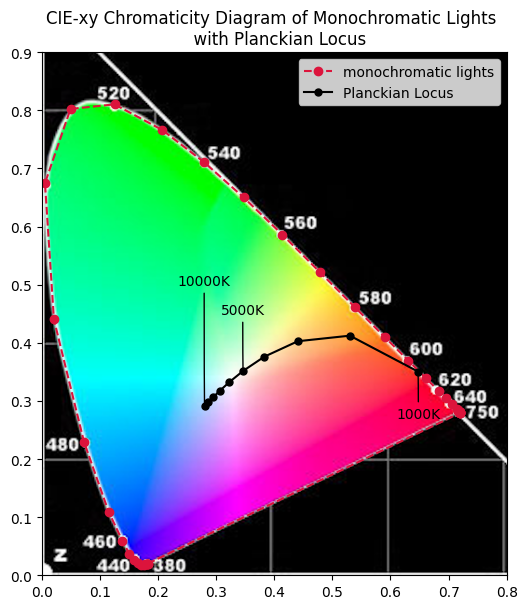

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
#plotting the Planckian Locus
fig, ax = plt.subplots(figsize= (6,8))
img = np.array(Image.open(image_path))
ax.plot(chromaticity_table["x"], chromaticity_table["y"], ls = '--', color= 'crimson', marker = 'o', label = 'monochromatic lights')
ax.plot([0.18221808,0.7203576], [0.01997838,0.2796424], ls = '--', color= 'crimson', marker = 'o')
ax.plot(now_x, now_y, color = 'black', marker = 'o', markersize = 5, label = 'Planckian Locus')
ax.annotate(('10000K'), (0.28025542,0.29059285), xytext=(0.234,0.5), xycoords='data', textcoords=None, arrowprops=dict(arrowstyle = '-', connectionstyle = 'angle3') )
ax.annotate(('5000K'), (0.34655592,0.35163224), xytext=(0.308,0.45), xycoords='data', textcoords=None, arrowprops=dict(arrowstyle = '-',connectionstyle = 'angle3'))
ax.annotate(('1000K'), (0.6472872,0.35052676), xytext=(0.61,0.27), xycoords='data', textcoords=None, arrowprops=dict(arrowstyle = '-',connectionstyle = 'angle3'))
ax.imshow(img, extent = [0,1,0,1])
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.9)
ax.legend()
ax.set_title('CIE-xy Chromaticity Diagram of Monochromatic Lights \n  with Planckian Locus')
plt.savefig("CIExyCD_PL.png")
plt.show()
files.download('CIExyCD_PL.png')

